# Import

In [23]:
from PIL import Image

import gymnasium as gym
from gymnasium.wrappers import TimeLimit
import panda_gym

from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack, VecTransposeImage
from stable_baselines3.common.evaluation import evaluate_policy

from hcr5_reach_with_gripper_env import HCR5ReachWithGripperEnv

# Constants

In [24]:
env_render_options = {
    "render_width": 480,
    "render_height": 480,
    "render_target_position": [-0.2, 0, 0],
    "render_distance": 1.2,
    "render_yaw": 90,
    "render_pitch": -30,
    "render_roll": 0,
}

# Envorinment setup

In [25]:
class ObsDictToArray(gym.ObservationWrapper):
    """Convert a dict obs {'observation': array, ...} into just the array."""
    def __init__(self, env):
        super().__init__(env)
        # Replace the observation_space with the sub-space you want:
        self.observation_space = self.env.observation_space.spaces["observation"]

    def observation(self, obs_dict):
        # obs_dict is {'observation': ..., 'achieved_goal': ..., ...}
        return obs_dict["observation"]

In [26]:
def make_env():
    # 1) Base goal-based env, which uses the full dict for reward internally
    raw = TimeLimit(HCR5ReachWithGripperEnv(
        render_mode="rgb_array",
        **env_render_options,
        control_type='joints',
        reward_type="combined",
    ),
    max_episode_steps=100)
    wrapped = ObsDictToArray(raw)
    # 2) Wrap it in a Monitor so info["episode"] = {"r": total_reward, "l": length}
    return Monitor(wrapped)


In [27]:
def make_vec_env(n_envs=1):
    vec_env = DummyVecEnv([make_env for i in range(n_envs)])
    vec_env = VecFrameStack(vec_env, n_stack=4)
    vec_env = VecTransposeImage(vec_env)
    return vec_env

vec_env = make_vec_env()
vec_env.observation_space

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

Box(0, 255, (12, 96, 96), uint8)

In [28]:
vec_env = make_vec_env()
observation, info = vec_env.envs[0].reset()
observation, info = vec_env.envs[0].reset()
observation, info = vec_env.envs[0].reset()
observation, info = vec_env.envs[0].reset()


observation.shape

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

(96, 96, 3)

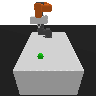

In [29]:
Image.fromarray(observation)

In [30]:
observation = vec_env.reset()
observation = vec_env.reset()
observation = vec_env.reset()
observation = vec_env.reset()

observation.shape

(1, 12, 96, 96)

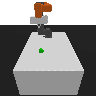

In [31]:
Image.fromarray(observation[0][9:].transpose(1, 2, 0))

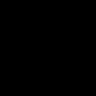

In [32]:
Image.fromarray(observation[0][6:9].transpose(1, 2, 0))

# New Agent

## Model Evaluation

In [11]:
model = PPO.load("agent_old.zip")
model.policy

ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(12, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=4096, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(12, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=4096, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_extractor): NatureCNN(
    (cnn)

In [12]:
total_all = sum(p.numel() for p in model.policy.parameters())
trainable_all = sum(p.numel() for p in model.policy.parameters() if p.requires_grad)
print(f"All params: {total_all:,}, Trainable: {trainable_all:,}")

All params: 2,196,143, Trainable: 2,196,143


In [13]:
vec_env = make_vec_env()
mean_reward, std_reward = evaluate_policy(
    model,
    vec_env,
    n_eval_episodes=100,
    deterministic=False,
    render=False,
)

print(f"Mean reward over 20 episodes: {mean_reward:.2f} ± {std_reward:.2f}")

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [14]:
vec_env = make_vec_env()
mean_reward, std_reward = evaluate_policy(
    model,
    vec_env,
    n_eval_episodes=100,
    deterministic=True,
    render=False,
)

print(f"Mean reward over 20 episodes: {mean_reward:.2f} ± {std_reward:.2f}")

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

## Demo

In [22]:
env = make_vec_env()
observation = env.reset()
images = 5 * [env.render()]
for _ in range(50):
    action = model.predict(observation, deterministic=True)[0]
    observation, reward, done, info = env.step(action)
    images.append(env.render())

    if done:
        for i in range(5):
            images.append(env.render())

frames = [Image.fromarray(img) for img in images]
frames[0].save(
    f"demo_agent/agent_old.gif",
    save_all=True, append_images=frames[1:],
    duration=150, loop=0,
)

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [29]:
env = make_vec_env()
observation = env.reset()
images = 5 * [env.render()]
for _ in range(50):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    images.append(env.render())

    if done:
        for i in range(5):
            images.append(env.render())

frames = [Image.fromarray(img) for img in images]
frames[0].save(
    f"demo_agent/random.gif",
    save_all=True, append_images=frames[1:],
    duration=150, loop=0,
)

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [30]:
gif_path   = f"demo_agent/agent_random.gif"  # ваша гіфка
frame_ids  = [0, 15, 30, 45]       # які кадри витягнути (нумерація з нуля)
out_format = "demo_agent/random_frame_{:02d}.png"   # шаблон імен файлів

with Image.open(gif_path) as gif:
    # GIF — це "seek-able" об’єкт; кількість кадрів:
    n_frames = gif.n_frames

    for idx in frame_ids:
        gif.seek(idx)                  # перейти до потрібного кадру
        frame = gif.convert("RGBA")    # безпечне перетворення у звичайне зображення
        frame.save(out_format.format(idx))
        print(f"✅  Збережено {out_format.format(idx)}")

✅  Збережено demo_training/random_frame_00.png
✅  Збережено demo_training/random_frame_15.png
✅  Збережено demo_training/random_frame_30.png
✅  Збережено demo_training/random_frame_45.png


In [44]:
gif_path   = f"demo_agent/agent_old.gif"  # ваша гіфка
frame_ids  = [1, 3, 6, 9]       # які кадри витягнути (нумерація з нуля)
out_format = "demo_agent/agent_old_episode_1_frame_{:02d}.png"   # шаблон імен файлів

with Image.open(gif_path) as gif:
    # GIF — це "seek-able" об’єкт; кількість кадрів:
    n_frames = gif.n_frames

    for idx in frame_ids:
        gif.seek(idx-1)                  # перейти до потрібного кадру
        frame = gif.convert("RGBA")    # безпечне перетворення у звичайне зображення
        frame.save(out_format.format(idx))
        print(f"✅  Збережено {out_format.format(idx)}")

✅  Збережено demo_agent/agent_old_episode_1_frame_01.png
✅  Збережено demo_agent/agent_old_episode_1_frame_03.png
✅  Збережено demo_agent/agent_old_episode_1_frame_06.png
✅  Збережено demo_agent/agent_old_episode_1_frame_09.png


# New Agent

In [33]:
model = PPO.load("agent_new.zip")
model.policy

ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(12, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=4096, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(12, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=4096, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_extractor): NatureCNN(
    (cnn)

In [43]:
vec_env = make_vec_env()
mean_reward, std_reward = evaluate_policy(
    model,
    vec_env,
    n_eval_episodes=100,
    deterministic=False,
    render=False,
)

print(f"Mean reward over 20 episodes: {mean_reward:.2f} ± {std_reward:.2f}")

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [44]:
vec_env = make_vec_env()
mean_reward, std_reward = evaluate_policy(
    model,
    vec_env,
    n_eval_episodes=100,
    deterministic=True,
    render=False,
)

print(f"Mean reward over 20 episodes: {mean_reward:.2f} ± {std_reward:.2f}")

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [34]:
env = make_vec_env()
observation = env.reset()
images = 5 * [env.render()]
for _ in range(100):
    action = model.predict(observation, deterministic=False)[0]
    observation, reward, done, info = env.step(action)
    images.append(env.render())

    if done:
        for i in range(5):
            images.append(env.render())

frames = [Image.fromarray(img) for img in images]
frames[0].save(
    f"demo_agent/agent_new_new_new.gif",
    save_all=True, append_images=frames[1:],
    duration=150, loop=0,
)

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
baseb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
flangeb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

In [34]:
gif_path   = f"demo_agent/agent_new.gif"  # ваша гіфка
frame_ids  = [1, 3, 6, 9]       # які кадри витягнути (нумерація з нуля)
out_format = "demo_agent/agent_new_episode_1_frame_{:02d}.png"   # шаблон імен файлів

with Image.open(gif_path) as gif:
    # GIF — це "seek-able" об’єкт; кількість кадрів:
    n_frames = gif.n_frames

    for idx in frame_ids:
        gif.seek(idx-1)                  # перейти до потрібного кадру
        frame = gif.convert("RGBA")    # безпечне перетворення у звичайне зображення
        frame.save(out_format.format(idx))
        print(f"✅  Збережено {out_format.format(idx)}")

✅  Збережено demo_training/agent_new_episode_1_frame_01.png
✅  Збережено demo_training/agent_new_episode_1_frame_03.png
✅  Збережено demo_training/agent_new_episode_1_frame_06.png
✅  Збережено demo_training/agent_new_episode_1_frame_09.png


In [35]:
gif_path   = f"demo_agent/agent_new.gif"  # ваша гіфка
frame_ids  = [24, 28, 33, 40]       # які кадри витягнути (нумерація з нуля)
out_format = "demo_agent/agent_new_episode_2_frame_{:02d}.png"   # шаблон імен файлів

with Image.open(gif_path) as gif:
    # GIF — це "seek-able" об’єкт; кількість кадрів:
    n_frames = gif.n_frames

    for idx in frame_ids:
        gif.seek(idx-1)                  # перейти до потрібного кадру
        frame = gif.convert("RGBA")    # безпечне перетворення у звичайне зображення
        frame.save(out_format.format(idx))
        print(f"✅  Збережено {out_format.format(idx)}")

✅  Збережено demo_training/agent_new_episode_2_frame_24.png
✅  Збережено demo_training/agent_new_episode_2_frame_28.png
✅  Збережено demo_training/agent_new_episode_2_frame_33.png
✅  Збережено demo_training/agent_new_episode_2_frame_40.png


In [36]:
gif_path   = f"demo_agent/agent_new.gif"  # ваша гіфка
frame_ids  = [41, 44, 49, 51]       # які кадри витягнути (нумерація з нуля)
out_format = "demo_agent/agent_new_episode_3_frame_{:02d}.png"   # шаблон імен файлів

with Image.open(gif_path) as gif:
    # GIF — це "seek-able" об’єкт; кількість кадрів:
    n_frames = gif.n_frames

    for idx in frame_ids:
        gif.seek(idx-1)                  # перейти до потрібного кадру
        frame = gif.convert("RGBA")    # безпечне перетворення у звичайне зображення
        frame.save(out_format.format(idx))
        print(f"✅  Збережено {out_format.format(idx)}")

✅  Збережено demo_training/agent_new_episode_3_frame_41.png
✅  Збережено demo_training/agent_new_episode_3_frame_44.png
✅  Збережено demo_training/agent_new_episode_3_frame_49.png
✅  Збережено demo_training/agent_new_episode_3_frame_51.png
